In [1]:
import tensorflow as tf

In [2]:
SEED = 12

tf.random.set_seed(SEED)
ran_num_1 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)
ran_num_2 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)

print(ran_num_1)
print(ran_num_2)

tf.Tensor(
[[2 2]
 [6 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[8 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [3]:
SEED = 12

tf.random.set_seed(SEED)
ran_num_1 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)
ran_num_2 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)

print(ran_num_1)
print(ran_num_2)

tf.Tensor(
[[2 2]
 [6 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[8 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [4]:
# SEED = 12

# tf.random.set_seed(SEED)
ran_num_1 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)
ran_num_2 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)

print(ran_num_1)
print(ran_num_2)

tf.Tensor(
[[8 4]
 [5 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 0]
 [7 0]], shape=(2, 2), dtype=int32)


In [5]:
SEED = 12

tf.random.set_seed(SEED)
ran_num_1 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)
ran_num_2 = tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype=tf.int32)

print(ran_num_1)
print(ran_num_2)

tf.Tensor(
[[2 2]
 [6 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[8 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [6]:
dice1 = tf.Variable(tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32))
dice2 = tf.Variable(tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32))

dice_sum = dice1 + dice2
print(dice_sum)

tf.Tensor(
[[ 9]
 [ 6]
 [10]
 [ 2]
 [ 7]
 [ 8]
 [ 9]
 [ 4]
 [ 3]
 [ 6]], shape=(10, 1), dtype=int32)


In [7]:
final_matrix = tf.concat(values=[dice1, dice2, dice_sum], axis=1)
print(final_matrix)

tf.Tensor(
[[ 3  6  9]
 [ 3  3  6]
 [ 4  6 10]
 [ 1  1  2]
 [ 1  6  7]
 [ 4  4  8]
 [ 3  6  9]
 [ 2  2  4]
 [ 2  1  3]
 [ 4  2  6]], shape=(10, 3), dtype=int32)


In [8]:
idx = tf.argmax(input=dice_sum)
print(f"max value: {dice_sum.numpy()[idx][0]} present at index: {idx[0]}")

max value: [10] present at index: 2


In [9]:
idx = tf.argmin(input=dice_sum)
print(f"min value: {dice_sum.numpy()[idx][0]} present at index: {idx[0]}")

min value: [2] present at index: 3


In [10]:
dice_sum.numpy()

array([[ 9],
       [ 6],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 9],
       [ 4],
       [ 3],
       [ 6]], dtype=int32)

In [11]:
dice_sum.numpy()[4][0]

7

## Checkpointing to restrore the matrix vals

In [12]:
var1 = tf.Variable(5*tf.ones((5,5)))
var1

<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]], dtype=float32)>

In [13]:
ckpt = tf.train.Checkpoint(var=var1)
savepath = ckpt.save("./vars.ckpt")

In [14]:
var1.assign(tf.zeros((5,5)))

<tf.Variable 'UnreadVariable' shape=(5, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [15]:
var1

<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [16]:
ckpt.restore(savepath)

In [17]:
var1

<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]], dtype=float32)>

## using tf.function <<< IMPORTANT


$z = x^3 * 6 + y^3$

In [18]:
def f1(x, y):
  return tf.reduce_mean(input_tensor=tf.multiply(x ** 3, 6) + y ** 3)

In [19]:
func = tf.function(f1)

In [20]:
x = tf.constant([3., -4.])
y = tf.constant([1., 4.])

In [21]:
f1(x,y).numpy() ## just using simple python function

-78.5

In [22]:
func(x, y).numpy()

-78.5

In [23]:
@tf.function ## << decorator
def f2(x, y):
  return tf.reduce_mean(input_tensor=tf.multiply(x ** 3, 6) + y ** 3)

In [24]:
f2(x, y).numpy()

-78.5

### Example of decorator

In [25]:
def decorate_it(input_func):
  def decorated_func():
    print("#"*10)
    input_func()
    print("#"*10)

  return decorated_func

def print_me():
  print("welcome to ineuron")

In [26]:
print_me()

welcome to ineuron


In [27]:
decorated = decorate_it(print_me)
decorated

<function __main__.decorate_it.<locals>.decorated_func()>

In [28]:
decorated()

##########
welcome to ineuron
##########


In [29]:
@decorate_it
def print_me2():
  print("welcome to ineuron")

In [30]:
print_me2()

##########
welcome to ineuron
##########


## Calculation of gradients

In [31]:
x = tf.random.normal(shape=(2,2))
y = tf.random.normal(shape=(2,2))

$f(x,y) = \sqrt{(x^2 + y^2)}$

$\nabla f(x,y) = \frac{\partial f}{\partial x}\hat{\imath} + \frac{\partial f}{\partial y}\hat{\jmath}$

In [32]:
with tf.GradientTape() as tape:
  tape.watch(x)
  f = tf.sqrt(tf.square(x) + tf.square(y))
  df_dx = tape.gradient(f, x) ## diff of f wrt x
  print(df_dx)

tf.Tensor(
[[-0.58996874  0.9930184 ]
 [ 0.39844632 -0.9196172 ]], shape=(2, 2), dtype=float32)


In [33]:
with tf.GradientTape() as tape:
  tape.watch(x)
  tape.watch(y)
  f = tf.sqrt(tf.square(x) + tf.square(y))
  df_dx, df_dy = tape.gradient(f, [x, y]) ## partial diff of f wrt x and y
  print(df_dx)
  print(df_dy)

tf.Tensor(
[[-0.58996874  0.9930184 ]
 [ 0.39844632 -0.9196172 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.807426   -0.11796025]
 [-0.9171917  -0.3928159 ]], shape=(2, 2), dtype=float32)


In [34]:
with tf.GradientTape() as tape:
  f = tf.sqrt(tf.square(x) + tf.square(y))
  df_dx = tape.gradient(f, x) ## diff of f wrt x
  print(df_dx)

None


In [35]:
x = tf.Variable(tf.random.normal(shape=(2,2)))
y = tf.Variable(tf.random.normal(shape=(2,2)))

In [36]:
with tf.GradientTape() as tape:
  f = tf.sqrt(tf.square(x) + tf.square(y))
  df_dx = tape.gradient(f, x) ## diff of f wrt x
  print(df_dx)

tf.Tensor(
[[-0.45863175 -0.99999464]
 [ 0.7261945  -0.586689  ]], shape=(2, 2), dtype=float32)


In [37]:
x = tf.Variable(3.)
y = tf.Variable(2.)

In [38]:
with tf.GradientTape() as tape:
  f = tf.sqrt(tf.square(x) + tf.square(y))
  df_dx = tape.gradient(f, x) ## diff of f wrt x
  print(df_dx)

tf.Tensor(0.8320503, shape=(), dtype=float32)


In [39]:
x/tf.sqrt(tf.square(x) + tf.square(y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8320503>

# Simple linear Regression Example -

$f(x) = W \cdot x + b$

In [40]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

x = tf.random.normal(shape=[NUM_EXAMPLES])
# x

In [41]:
noise = tf.random.normal(shape=[NUM_EXAMPLES])
# noise = 0

In [42]:
y = x * TRUE_W + TRUE_B + noise

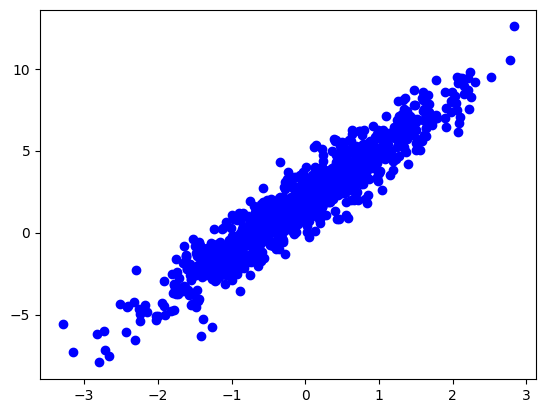

In [43]:
import matplotlib.pyplot as plt


plt.scatter(x, y, c="b")
plt.show()

#### Lets define a model

In [44]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b


In [45]:
class Test:
  def __init__(self, x):
    self.x = x

  def __call__(self):
    return self.x ** 2

In [46]:
obj = Test(2)

In [47]:
obj()

4

In [48]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    y_hat = self.w * x + self.b
    return y_hat

In [49]:
model = MyModel()

In [50]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [51]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [52]:
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

In [53]:
model(3.0).numpy()

15.0

#### Define a loss function

In [54]:
def MSE_loss(target_y, predicted_y):
  error = target_y - predicted_y
  squared_error = tf.square(error)
  mse = tf.reduce_mean(squared_error)
  return mse

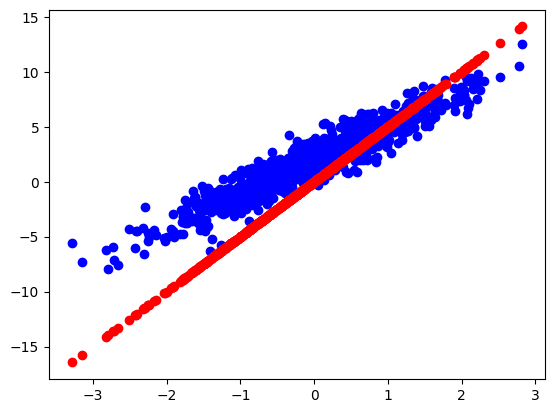

In [55]:
plt.scatter(x, y, c="b")

pred_y = model(x) ## without training
plt.scatter(x, pred_y, c="r")
plt.show()

In [56]:
current_loss = MSE_loss(y, model(x))
current_loss.numpy() ## without training

8.972121

#### Define our training loop

In [57]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as tape:
    current_loss = MSE_loss(y, model(x))

  dc_dw, dc_db = tape.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dc_dw)
  model.b.assign_sub(learning_rate * dc_db)

In [58]:
model = MyModel()

Ws, bs = [], []
epochs = 10
learning_rate = 0.1

w = model.w.numpy()
b = model.b.numpy()

init_loss = MSE_loss(y, model(x))
 ## without training

print(f"Initial W: {w}, initial bias: {b}, initial loss: {init_loss.numpy()}")

Initial W: 5.0, initial bias: 0.0, initial loss: 8.972121238708496


In [59]:
for epoch in range(epochs):
  train(model, x, y, learning_rate)

  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = MSE_loss(y, model(x))

  print(f"For epoch: {epoch}, W: {Ws[-1]}, b: {bs[-1]}, current_loss: {current_loss}")

For epoch: 0, W: 4.613381385803223, b: 0.41168197989463806, current_loss: 6.10175895690918
For epoch: 1, W: 4.302654266357422, b: 0.7395656108856201, current_loss: 4.265348434448242
For epoch: 2, W: 4.052910327911377, b: 1.0006974935531616, current_loss: 3.0903468132019043
For epoch: 3, W: 3.8521718978881836, b: 1.2086585760116577, current_loss: 2.3384745121002197
For epoch: 4, W: 3.6908159255981445, b: 1.3742684125900269, current_loss: 1.8573169708251953
For epoch: 5, W: 3.561109781265259, b: 1.5061461925506592, current_loss: 1.549375057220459
For epoch: 6, W: 3.456840991973877, b: 1.6111578941345215, current_loss: 1.352273941040039
For epoch: 7, W: 3.373016834259033, b: 1.6947729587554932, current_loss: 1.2261056900024414
For epoch: 8, W: 3.3056259155273438, b: 1.761348009109497, current_loss: 1.1453359127044678
For epoch: 9, W: 3.251443862915039, b: 1.8143532276153564, current_loss: 1.0936236381530762


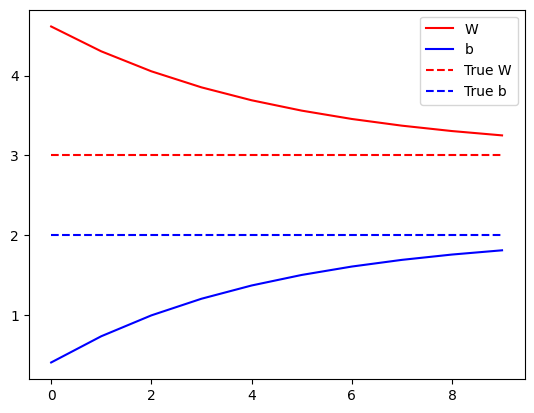

In [60]:
plt.plot(range(epochs), Ws, "r", range(epochs), bs, "b")

plt.plot([TRUE_W] * epochs, "r--", [TRUE_B] *epochs, "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

In [61]:
[TRUE_W] * epochs

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

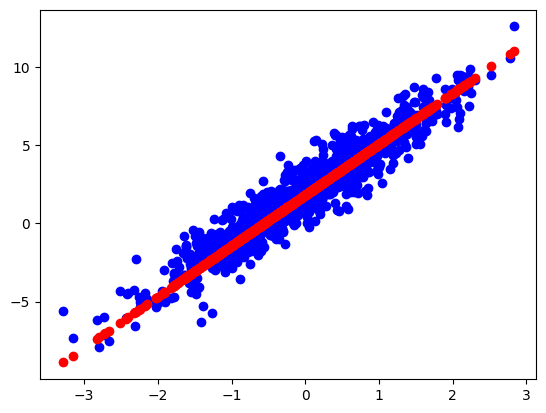

In [62]:
plt.scatter(x, y, c="b")

pred_y = model(x) ## without training
plt.scatter(x, pred_y, c="r")
plt.show()

In [63]:
current_loss = MSE_loss(y, model(x))
current_loss.numpy() ## after training

1.0936236

In [64]:
def branch_and_subjects_in_graduation(*args, branch):
    print(f"My branch was {branch}")
    return f"I liked these subjects in graduation {args}"

results = branch_and_subjects_in_graduation("Digital Image Processing", "Microprocessor", branch="Electronics engineering")
print(results)

My branch was Electronics engineering
I liked these subjects in graduation ('Digital Image Processing', 'Microprocessor')


In [65]:
results = branch_and_subjects_in_graduation("ML", "DL", branch="data science")
print(results)

My branch was data science
I liked these subjects in graduation ('ML', 'DL')


In [66]:
results = branch_and_subjects_in_graduation("ML", "stats", branch="data science")
print(results)

My branch was data science
I liked these subjects in graduation ('ML', 'stats')


In [67]:
results = branch_and_subjects_in_graduation("ML", "stats", "DL", "CV", branch="data science")
print(results)

My branch was data science
I liked these subjects in graduation ('ML', 'stats', 'DL', 'CV')


In [68]:
def marks_in_subjects_of_semester(**kwargs):
    for subject, marks in kwargs.items():
        print(f"Score in {subject} = {marks}")

marks_in_subjects_of_semester(DL = 78, ML= 79)

Score in DL = 78
Score in ML = 79
